In [ ]:
# ! pip install imageio

In [14]:
import os
import numpy as np
import imageio
import torch

In [3]:
img_arr=imageio.imread('C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/bobby.jpg')
print(img_arr.shape)

(976, 1334, 3)


C:\Users\danda\AppData\Local\Temp\ipykernel_6248\1533813627.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr=imageio.imread('C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/bobby.jpg')


In [6]:
#make image into tprch tensor
#pytorch wanrs images in
#channel x height x width
img=torch.from_numpy(img_arr) #will be loaded in order height, width, channel
print (img.shape)

torch.Size([976, 1334, 3])


In [7]:
out=img.permute(2, 0, 1) #changes to channel x height x width
print (out.shape)

torch.Size([3, 976, 1334])


## batch tensor creation

In [8]:
batch_size=3
batch=torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8) #batch size, channel, z, y, type
batch.shape

torch.Size([3, 3, 256, 256])

In [9]:
data_dir='C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/image-cats/'
#pulls the name of each file in the given directory
filenames=[name for name in os.listdir(data_dir)]#list comprehension is when you do a bunch of operations in a list
filenames

['cat1.png', 'cat2.png', 'cat3.png']

In [12]:
for i, filename in enumerate(filenames):
    img_arr=imageio.imread(os.path.join(data_dir, filename))#reads the files into img_arr
    #print(img_arr.shape)
    img_t=torch.from_numpy(img_arr)
    img_t=img_t.permute(2, 0, 1)
    #print(img_t.shape)
    img_t=img_t[:3, :, :] #splicing, the two blank ones are implied and dont need to be there the 3 stands for RGB and slices out extra (i.e. RGBT)
    batch[i]=img_t


C:\Users\danda\AppData\Local\Temp\ipykernel_6248\462419735.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr=imageio.imread(os.path.join(data_dir, filename))#reads the files into img_arr


In [14]:
print(batch[0])

tensor([[[156, 152, 124,  ..., 150, 149, 158],
         [174, 134, 165,  ..., 120, 136, 138],
         [127, 156, 107,  ..., 131, 143, 164],
         ...,
         [116, 130, 129,  ..., 127, 118, 112],
         [129, 130, 123,  ..., 115, 121, 114],
         [129, 123, 118,  ..., 113, 121, 120]],

        [[139, 135, 109,  ..., 135, 135, 147],
         [160, 119, 149,  ..., 105, 122, 124],
         [113, 140,  90,  ..., 118, 129, 152],
         ...,
         [ 99, 110, 111,  ..., 117, 108, 103],
         [111, 111, 106,  ..., 106, 112, 105],
         [111, 104, 102,  ..., 103, 110, 111]],

        [[129, 123,  98,  ..., 131, 132, 145],
         [155, 110, 137,  ..., 102, 119, 121],
         [104, 132,  80,  ..., 112, 125, 146],
         ...,
         [ 93, 108, 105,  ..., 125, 115, 108],
         [108, 108,  98,  ..., 110, 117, 110],
         [107,  98,  95,  ..., 108, 115, 116]]], dtype=torch.uint8)


## normalization / standardization/ scaling
$ X\_normalize= \frac{X - mean}{standard\_dev} $

In [16]:
#the image is x and we take the mean value of the x (image) and divide by stand_dev if in color
batch=batch.float()
#we have batch number, channel, height, and weight, we want channel (3) and to get this for each color type
n_channels=batch.shape[1]#index of channel
#do this 3 times so that we get a value for each color (RGB)
for c in range(n_channels):
    mean= torch.mean(batch[:, c]) #ignores batch # and goes to c which iterates through each channel type
    standard_dev= torch.std(batch[:, c])#first time will go through R then second will go G then 3rd B
    batch[:, c]=(batch[:, c] - mean)/standard_dev
    

In [17]:
print(batch[0])

tensor([[[ 0.1439,  0.0730, -0.4234,  ...,  0.0375,  0.0198,  0.1794],
         [ 0.4631, -0.2461,  0.3035,  ..., -0.4944, -0.2107, -0.1752],
         [-0.3703,  0.1439, -0.7249,  ..., -0.2993, -0.0866,  0.2858],
         ...,
         [-0.5653, -0.3171, -0.3348,  ..., -0.3703, -0.5298, -0.6362],
         [-0.3348, -0.3171, -0.4412,  ..., -0.5830, -0.4766, -0.6007],
         [-0.3348, -0.4412, -0.5298,  ..., -0.6185, -0.4766, -0.4944]],

        [[ 0.4632,  0.3874, -0.1058,  ...,  0.3874,  0.3874,  0.6150],
         [ 0.8615,  0.0839,  0.6529,  ..., -0.1816,  0.1408,  0.1787],
         [-0.0299,  0.4822, -0.4661,  ...,  0.0649,  0.2736,  0.7098],
         ...,
         [-0.2954, -0.0868, -0.0678,  ...,  0.0460, -0.1247, -0.2196],
         [-0.0678, -0.0678, -0.1627,  ..., -0.1627, -0.0489, -0.1816],
         [-0.0678, -0.2006, -0.2385,  ..., -0.2196, -0.0868, -0.0678]],

        [[ 0.7792,  0.6573,  0.1495,  ...,  0.8198,  0.8401,  1.1041],
         [ 1.3072,  0.3933,  0.9417,  ...,  0

## Unsqueeze 

In [18]:
batch.shape

torch.Size([3, 3, 256, 256])

In [19]:
batch_new=torch.unsqueeze(batch, 0)
batch_new.shape
#adds another dimension to it in the first index, second number is index to add it into 

torch.Size([1, 3, 3, 256, 256])

## Read CSV 

In [21]:
#usually would be done with pandas, but we are using numpy for now
wine_path='C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/winequality-white.csv'
wineq_numpy=np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)#skip the title row

In [22]:
print(wineq_numpy.shape)
(#samples, features (11x1))

(4898, 12)


In [23]:
wineq=torch.from_numpy(wineq_numpy)

### Get X and y by splicing

In [26]:
#exam type question
#in a csv where the data is in columns 0-10 and y result 
  ##is in index 11
#he wants X and y sliced from above
X=wineq[:, :11]#all the rows, and all of the columns minus 
  ##the predicted column (last column), also this is a range
#or: X=wineq[:, -1] which starts from the end and gets all 
  ##but the last column, prefered option
X.shape
y=wineq[:, 11]#this gives you the 11th index, so the last 
  ##column where predictions are
y=torch.unsqueeze(y, 1)#unsqueeze so you can see the second 
  ##index, sometimes needed sometimes not depending on algorithm
y.shape

torch.Size([4898, 1])

## more image processing / manipulation

In [1]:
# import torchvision 
from PIL import Image, ImageDraw, ImageFilter

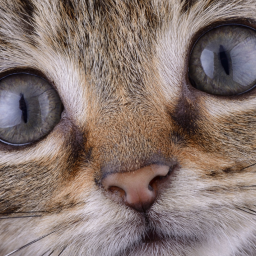

In [7]:
#load images using PIL
original_img=Image.open('C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/image-cats/cat1.png')
original_img

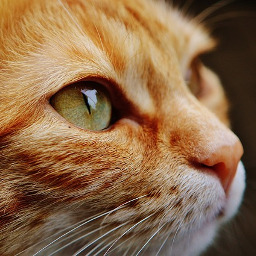

In [8]:
img_to_add=Image.open('C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/image-cats/cat2.png')
img_to_add

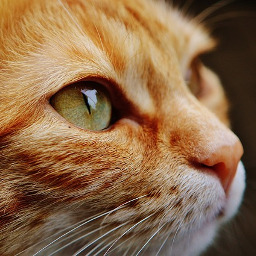

In [4]:
#paste one image into the other image
original_img.paste(img_to_add)
original_img
#assumption is one of the images is ontop of the other, needs to be resized in order for the images to be side by side

## Re-sizing images 

In [5]:
#when making code do it as small as possible until it works and then scale things up
#resizing is good for scaling problems and normalization

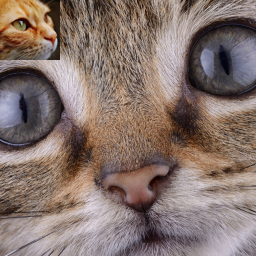

In [9]:
img_to_add=img_to_add.resize((60, 60))
original_img.paste(img_to_add)
original_img

## Specify position to paste

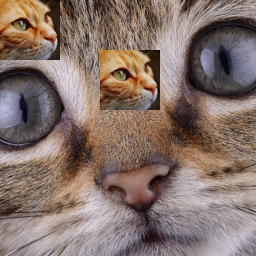

In [10]:
original_img.paste(img_to_add, (100, 50))
original_img

In [11]:
#save the new image
original_img.save('C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/image-cats/mod_cat.jpg')

## Img to Numpy to Image

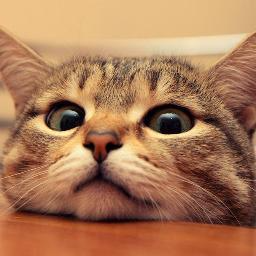

In [12]:
my_img=Image.open('C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/image-cats/cat3.png')
my_img

In [15]:
img_np=np.array(my_img)
img_np.shape

(256, 256, 3)

In [24]:
new_img_np=img_np[:, :, :-1] #remove the last channel (blue)
new_img_np.shape

(256, 256, 2)

ValueError: Could not save to JPEG for display

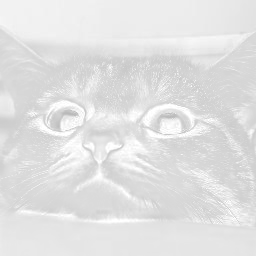

In [25]:
pil_image=Image.fromarray(new_img_np)
pil_image

## Noise Image made using random values

In [26]:
array=np.random.randint(255, size=(400, 400), dtype=np.uint8)

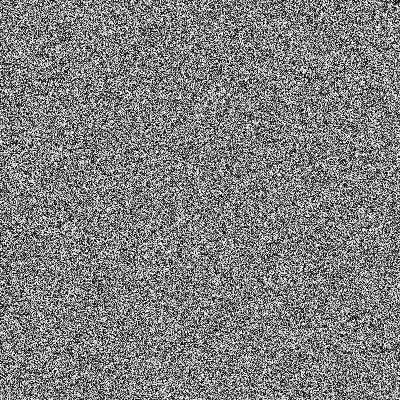

In [27]:
image=Image.fromarray(array)
image

## read data from a library ( torchvision )

In [30]:
# !pip install torchvision

In [31]:
from torchvision import datasets

In [32]:
data_path='C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/cifar10data/'
cifar10=datasets.CIFAR10(data_path, train=True, download=True)#gives training data and not testing
#this will download daya from torchvision into your data folder for use

100.0%


Extracting C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/cifar10data/cifar-10-python.tar.gz to C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/cifar10data/


In [34]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: C:/Users/danda/Desktop/ITS 520/PyTorch-main/basics/data/data/cifar10data/
    Split: Train

In [36]:
img, label=cifar10[700]

In [37]:
label

0

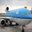

In [38]:
img